In [996]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
import json
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [997]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/supervisedMLKaggle')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [998]:
df = pd.read_excel ('dataset.xlsx')

In [999]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [1000]:
df.columns

Index(['text', 'label'], dtype='object')

In [1001]:
df

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
...,...,...
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0


In [1002]:
df['label'].value_counts()

0.0    6247
1.0     733
Name: label, dtype: int64

In [1003]:
df.isnull().sum()

text     10
label     2
dtype: int64

In [1004]:
df=df.dropna(how='any')

In [1005]:
df.isnull().sum()

text     0
label    0
dtype: int64

FEATURE ENGINEERING:

In [1006]:
df['Total_word']= df['text'].apply(lambda x : len(x.split()))

In [1007]:
df['Total_word']

0        3
1       10
2       14
3       11
4       14
        ..
6977     5
6978    11
6979     2
6980    18
6981     5
Name: Total_word, Length: 6970, dtype: int64

In [1008]:
df

,text,label,Total_word
0,oh my gosh,1.0,3
1,"trouble sleeping, confused mind, restless hear...",1.0,10
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14
3,I've shifted my focus to something else but I'...,1.0,11
4,"I'm restless and restless, it's been a month n...",1.0,14
...,...,...,...
6977,I can't forget you #SpiritHadrian,0.0,5
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0,11
6979,Dai5y! <3,0.0,2
6980,tired of clowns but still hopefully tonight if...,0.0,18


In [1009]:
def count_total_char(text): #compter le nombre de caractère
  char = 0
  for word in text.split():
    char+=len(word)
  return char

In [1010]:
df

,text,label,Total_word
0,oh my gosh,1.0,3
1,"trouble sleeping, confused mind, restless hear...",1.0,10
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14
3,I've shifted my focus to something else but I'...,1.0,11
4,"I'm restless and restless, it's been a month n...",1.0,14
...,...,...,...
6977,I can't forget you #SpiritHadrian,0.0,5
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0,11
6979,Dai5y! <3,0.0,2
6980,tired of clowns but still hopefully tonight if...,0.0,18


In [1011]:
df['num_char']=df['text'].apply(count_total_char)

In [1012]:
df

,text,label,Total_word,num_char
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59
...,...,...,...,...
6977,I can't forget you #SpiritHadrian,0.0,5,29
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0,11,82
6979,Dai5y! <3,0.0,2,8
6980,tired of clowns but still hopefully tonight if...,0.0,18,79


<Axes: xlabel='num_char', ylabel='Density'>

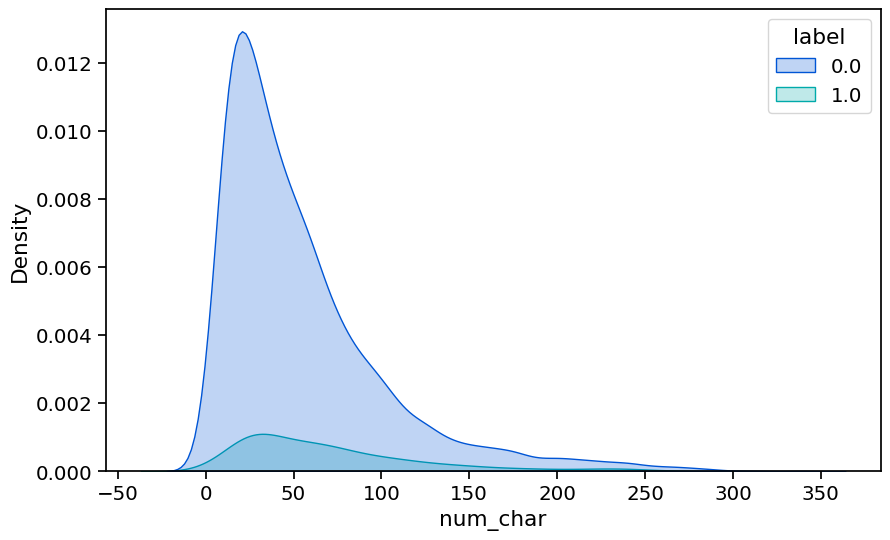

In [1013]:
plt.figure(figsize=(10,6))
sns.kdeplot(x = df['num_char'], hue = df['label'], palette = 'winter', shade = 'True')

Text Preprocessing

In [1014]:
def lower_text(texte):
  texte= texte.lower()
  return texte

In [1015]:
df['text']=df['text'].apply(lower_text)

In [1016]:
df

,text,label,Total_word,num_char
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"all wrong, back off dear, forward doubt. stay ...",1.0,14,65
3,i've shifted my focus to something else but i'...,1.0,11,51
4,"i'm restless and restless, it's been a month n...",1.0,14,59
...,...,...,...,...
6977,i can't forget you #spirithadrian,0.0,5,29
6978,€ ®šæœÿâ˜†ã€'..dj daiki! dj daiki! dj daiki!.d...,0.0,11,82
6979,dai5y! <3,0.0,2,8
6980,tired of clowns but still hopefully tonight if...,0.0,18,79


In [1017]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['text'] = df['text'].apply(remove_url)

In [1018]:
df['text']=df['text'].apply(remove_url)

In [1019]:
df['text'] = df['text'].map(lambda x : re.sub('[,\.!?()"]', '', x))

In [1020]:
df['text']

0                                              oh my gosh
1       trouble sleeping confused mind restless heart ...
2       all wrong back off dear forward doubt stay in ...
3       i've shifted my focus to something else but i'...
4       i'm restless and restless it's been a month no...
                              ...                        
6977                    i can't forget you #spirithadrian
6978    € ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979                                             dai5y <3
6980    tired of clowns but still hopefully tonight if...
6981                                   mw subi wn la vaca
Name: text, Length: 6970, dtype: object

In [1021]:
def tokenization(text):
  text=nltk.tokenize.word_tokenize(text)
  return text

In [1022]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1023]:
def perform_stemming(text):
  stemmer = PorterStemmer()
  new_list=[]
  words=tokenization(text)
  for word in words:
    new_list.append(stemmer.stem(word))
  return " ".join(new_list) + " "

In [1024]:
df['text_2']=df['text'].apply(perform_stemming)

In [1025]:
df['text_2']

0                                             oh my gosh 
1       troubl sleep confus mind restless heart all ou...
2       all wrong back off dear forward doubt stay in ...
3       i 've shift my focu to someth els but i 'm sti...
4       i 'm restless and restless it 's been a month ...
                              ...                        
6977                 i ca n't forget you # spirithadrian 
6978    € ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979                                           dai5i < 3 
6980    tire of clown but still hope tonight if not to...
6981                                  mw subi wn la vaca 
Name: text_2, Length: 6970, dtype: object

In [1026]:
df['text']

0                                              oh my gosh
1       trouble sleeping confused mind restless heart ...
2       all wrong back off dear forward doubt stay in ...
3       i've shifted my focus to something else but i'...
4       i'm restless and restless it's been a month no...
                              ...                        
6977                    i can't forget you #spirithadrian
6978    € ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979                                             dai5y <3
6980    tired of clowns but still hopefully tonight if...
6981                                   mw subi wn la vaca
Name: text, Length: 6970, dtype: object

In [1027]:
df['text_2'].head()

0                                          oh my gosh 
1    troubl sleep confus mind restless heart all ou...
2    all wrong back off dear forward doubt stay in ...
3    i 've shift my focu to someth els but i 'm sti...
4    i 'm restless and restless it 's been a month ...
Name: text_2, dtype: object

In [1028]:
#df['text']=df['text'].apply(str)

In [1029]:
stopwords = set(STOPWORDS)

In [1030]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1031]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [1032]:
df['text_2']

0                                             oh my gosh 
1       troubl sleep confus mind restless heart all ou...
2       all wrong back off dear forward doubt stay in ...
3       i 've shift my focu to someth els but i 'm sti...
4       i 'm restless and restless it 's been a month ...
                              ...                        
6977                 i ca n't forget you # spirithadrian 
6978    € ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979                                           dai5i < 3 
6980    tire of clown but still hope tonight if not to...
6981                                  mw subi wn la vaca 
Name: text_2, Length: 6970, dtype: object

In [1033]:
type(df['text_2'][0])

str

In [1034]:
text_data = df['text_2'].str.cat(sep=' ')

In [1035]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text_data)

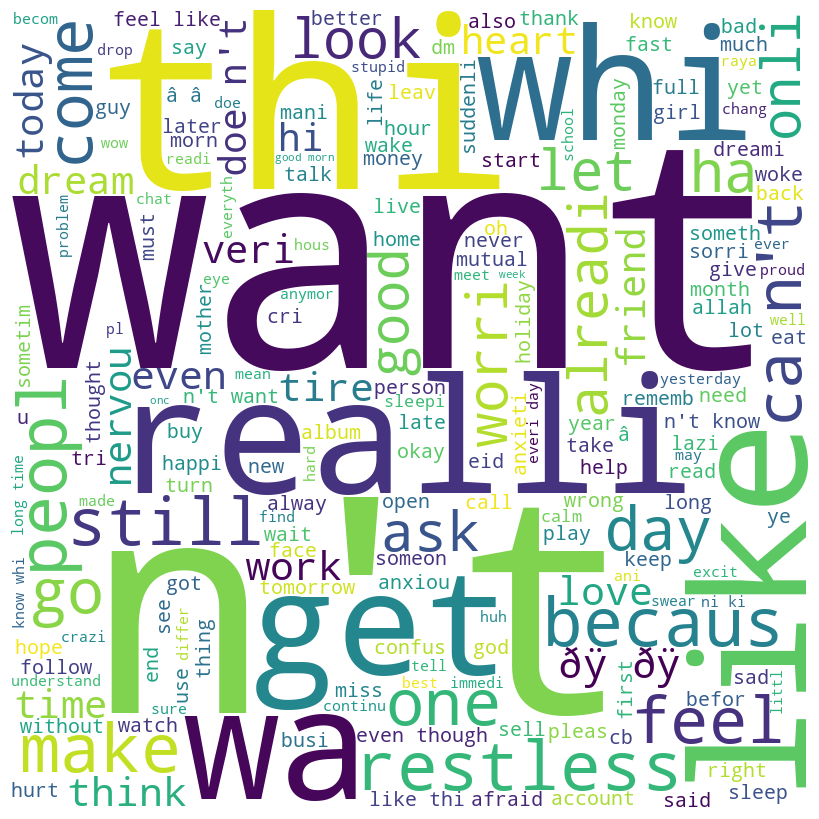

In [1036]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [1037]:
df['text'].isnull().sum()

0

In [1038]:
df

,text,label,Total_word,num_char,text_2
0,oh my gosh,1.0,3,8,oh my gosh
1,trouble sleeping confused mind restless heart ...,1.0,10,55,troubl sleep confus mind restless heart all ou...
2,all wrong back off dear forward doubt stay in ...,1.0,14,65,all wrong back off dear forward doubt stay in ...
3,i've shifted my focus to something else but i'...,1.0,11,51,i 've shift my focu to someth els but i 'm sti...
4,i'm restless and restless it's been a month no...,1.0,14,59,i 'm restless and restless it 's been a month ...
...,...,...,...,...,...
6977,i can't forget you #spirithadrian,0.0,5,29,i ca n't forget you # spirithadrian
6978,€ ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...,0.0,11,82,€ ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979,dai5y <3,0.0,2,8,dai5i < 3
6980,tired of clowns but still hopefully tonight if...,0.0,18,79,tire of clown but still hope tonight if not to...


In [1039]:
df[df['label']==1]['text']

0                                             oh my gosh
1      trouble sleeping confused mind restless heart ...
2      all wrong back off dear forward doubt stay in ...
3      i've shifted my focus to something else but i'...
4      i'm restless and restless it's been a month no...
                             ...                        
728              i'm really worried but i don't know why
729    it's never too late to take care of yourself i...
730    it's really restless since yesterday thinking ...
731                                restless and agitated
732    hey please can i ask for positive or enthusias...
Name: text, Length: 730, dtype: object

In [1040]:
df['label'].value_counts()

0.0    6240
1.0     730
Name: label, dtype: int64

In [1041]:
import collections

In [1042]:
df.columns

Index(['text', 'label', 'Total_word', 'num_char', 'text_2'], dtype='object')

In [1043]:
no_dep_word=[]
for sentence in df[df['label']==0]['text'].to_list():
  for word in sentence.split():
    no_dep_word.append(word)

#dataframe qui contient les mots les plus fréquents
df_1 = pd.DataFrame(Counter(no_dep_word).most_common(25), columns=['Word', 'Frequency'])

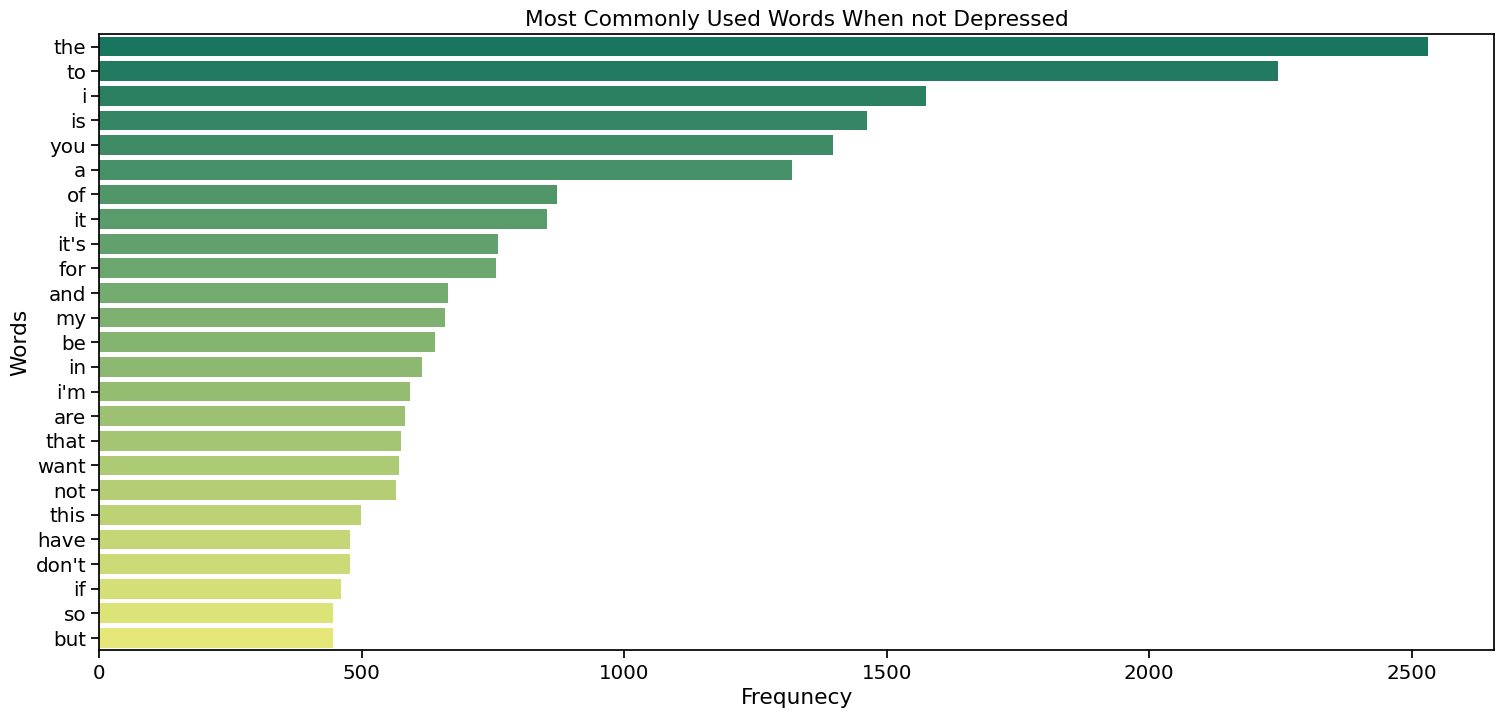

In [1044]:
sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df_1['Word'], x= df_1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

VECTORIZATION

In [1070]:
df[df['label']==1]['text'][8]

"i haven't slept well for 2 days it's like i'm restless why huh :[]"

In [1046]:
df

,text,label,Total_word,num_char,text_2
0,oh my gosh,1.0,3,8,oh my gosh
1,trouble sleeping confused mind restless heart ...,1.0,10,55,troubl sleep confus mind restless heart all ou...
2,all wrong back off dear forward doubt stay in ...,1.0,14,65,all wrong back off dear forward doubt stay in ...
3,i've shifted my focus to something else but i'...,1.0,11,51,i 've shift my focu to someth els but i 'm sti...
4,i'm restless and restless it's been a month no...,1.0,14,59,i 'm restless and restless it 's been a month ...
...,...,...,...,...,...
6977,i can't forget you #spirithadrian,0.0,5,29,i ca n't forget you # spirithadrian
6978,€ ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...,0.0,11,82,€ ®šæœÿâ˜†ã€'dj daiki dj daiki dj daikidj daik...
6979,dai5y <3,0.0,2,8,dai5i < 3
6980,tired of clowns but still hopefully tonight if...,0.0,18,79,tire of clown but still hope tonight if not to...


In [1047]:
X=df.iloc[:, 0].values
y=df['label'].values

In [1048]:
X

array(['oh my gosh',
       'trouble sleeping confused mind restless heart all out of tune',
       'all wrong back off dear forward doubt stay in a restless and restless place',
       ..., 'dai5y <3',
       'tired of clowns but still hopefully tonight if not tomorrow ™ but mas tm also no teaser yet',
       'mw subi wn la vaca'], dtype=object)

In [1049]:
type(X)

numpy.ndarray

In [1050]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify= y)

In [1051]:
tfidf = TfidfVectorizer(max_features= 2500) #min_df=1, max_df=1)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [1052]:
tfidf

TfidfVectorizer(max_features=2500)

Modeling

In [1053]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [1054]:
type(X_test)

numpy.ndarray

In [1055]:
# Probabilités prédites
y_prob = model.predict_proba(X_test)


In [1056]:
y_pred = model.predict(X_test)

In [1057]:
y_prob

array([[8.80000000e-01, 1.20000000e-01],
       [9.99457243e-01, 5.42756552e-04],
       [9.57134535e-01, 4.28654651e-02],
       ...,
       [9.60000000e-01, 4.00000000e-02],
       [2.50000000e-01, 7.50000000e-01],
       [8.50000000e-01, 1.50000000e-01]])

In [1058]:
# Calcul de l'accuracy
accuracy = round(accuracy_score(y_test, y_pred), 3)

# Calcul de la précision
precision = round(precision_score(y_test, y_pred), 3)

# Calcul du rappel
recall = round(recall_score(y_test, y_pred), 3)

In [1059]:
accuracy

0.989

In [1060]:
precision

0.992

In [1061]:
recall

0.897

In [1062]:
import joblib
from pickle import *

In [1063]:
!pip install joblib

In [1064]:
loaded_model= joblib.dump(model, 'saved_model.joblib')

In [1065]:
drive.mount('/content/drive')
chemin_du_modele='/content/drive/My Drive/supervisedMLKaggle/saved_model.joblib'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1066]:
loaded_model = joblib.load(chemin_du_modele)

In [1067]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6970 entries, 0 to 6981
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        6970 non-null   object 
 1   label       6970 non-null   float64
 2   Total_word  6970 non-null   int64  
 3   num_char    6970 non-null   int64  
 4   text_2      6970 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 584.8+ KB


Test du modèle:

In [1071]:
# Supposons que text_test contienne une seule entrée que vous voulez tester
text_test = "i haven't slept well for 2 days it's like i'm restless why huh"

# Prétraitement du texte de test
text_test = lower_text(text_test)
text_test = remove_url(text_test)
text_test = re.sub('[,\.!?()"]', '', text_test)
text_test = perform_stemming(text_test)

# Transformer le texte de test en vecteur de caractéristiques TF-IDF en utilisant le TfidfVectorizer entraîné
text_vec = tfidf.transform([text_test])

# Faire la prédiction avec le modèle chargé
single_prediction = loaded_model.predict(text_vec)

# Afficher la prédiction
print("Prédiction:", single_prediction)


Prédiction: [1.]
